In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [18]:
df = pd.read_csv('data/druguse.tsv', sep='\t')

In [4]:
df.head()

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
0,1,50886467,2,4,4,991,9991,91,91,91,...,1,1,99,9,9,2,2,1275.597449,30054,2
1,2,13766883,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,2,2,5191.071173,30031,1
2,3,17772877,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,3,3,419.742011,30056,2
3,4,45622817,1,99,99,13,9999,99,2,93,...,1,1,2,1,1,2,2,1449.303889,30054,1
4,5,17239390,1,99,99,11,9999,99,4,93,...,1,1,1,1,1,1,1,15344.293577,30012,2


In [ ]:
#HALLUCINOGENS

hall = ['HALFLAG', 'HALYR', 'HALMON', 'LSDFLAG', 'LSDYR', 'LSDMON', 'PCPFLAG', 'PCPYR', 'PCPMON', 'ECSFLAG', 'ECSYR', 'ECSMON', 'PEYOTE2', 'MESC2', 'PSILCY2', 'HALYDAYS', 'HALMDAYS', 'FUHAL18', 'FUHAL21', 'FULSD18', 'FULSD21', 'FUPCP18', 'FUPCP21', 'FUECS18', 'FUECS21', 'LSLAST', 'TOTHALL']


In [ ]:
halldf = df[['HALFLAG', 'HALYR', 'HALMON', 'LSDFLAG', 'LSDYR', 'LSDMON', 'PCPFLAG', 'PCPYR', 'PCPMON', 'ECSFLAG', 'ECSYR', 'ECSMON', 'PEYOTE2', 'MESC2', 'PSILCY2', 'HALYDAYS', 'HALMDAYS', 'FUHAL18', 'FUHAL21', 'FULSD18', 'FULSD21', 'FUPCP18', 'FUPCP21', 'FUECS18', 'FUECS21', 'LSLAST', 'TOTHALL']].copy()

In [20]:
#Tobacco vs. Depression
ever_used = df[['CIGFLAG', 'AMDELT']]
cig_dep = ever_used[ever_used.AMDELT > 0]
cig_yes_dep_yes = cig_dep[(cig_dep.CIGFLAG == 1) & (cig_dep.AMDELT == 1)]
cig_yes_dep_no = cig_dep[(cig_dep.CIGFLAG == 1) & (cig_dep.AMDELT == 2)]
cig = len(cig_yes_dep_yes) + len(cig_yes_dep_no)
cig_yes_dep_yes_percent = len(cig_yes_dep_yes) / cig
cig_no_dep_yes = cig_dep[(cig_dep.CIGFLAG == 0) & (cig_dep.AMDELT == 1)]
cig_no_dep_no = cig_dep[(cig_dep.CIGFLAG == 0) & (cig_dep.AMDELT == 2)]
no_cig = len(cig_no_dep_no) + len(cig_no_dep_yes)
cig_no_dep_yes_percent = len(cig_no_dep_yes) / no_cig 

In [30]:
grouped = cig_dep.groupby(['CIGFLAG', 'AMDELT']).size().reset_index(name='count')

In [31]:
grouped

,CIGFLAG,AMDELT,count
0,0,1,1476
1,0,2,11625
2,1,1,4110
3,1,2,20380


In [55]:
grouped.iloc[0,2] / (grouped.iloc[0,2] + grouped.iloc[1,2])

0.11266315548431417

In [56]:
grouped.iloc[2,2] / (grouped.iloc[2,2] + grouped.iloc[3,2])

0.16782360146998776

In [59]:
def dep_precent(df):
    consumers = []
    non_consumers = []
    for col in df.columns:
        ever_used = df[[col, 'AMDELT']]
        grouped = df.groupby([col, 'AMDELT']).size().reset_index(name='count')
        non_consumer = grouped.iloc[0,2] / (grouped.iloc[0,2] + grouped.iloc[1,2])
        consumer = grouped.iloc[2,2] / (grouped.iloc[2,2] + grouped.iloc[3,2])
        non_consumers.append(non_consumer)
        consumers.append(consumer)
    return consumers, non_consumers    

In [74]:
grouped = ever_used.groupby(['AMDELT', 'AMDELT']).size().reset_index(name='count')

ValueError: Duplicated level name: "AMDELT", assigned to level 1, is already used for level 0.

In [72]:
ever_used = df[['CIGFLAG', 'CGRFLAG', 'SNFFLAG', 'ALCFLAG', 'MRJFLAG', 'COCFLAG', 'CRKFLAG', 'HERFLAG','HALFLAG','INHFLAG', 'ANLFLAG', 'TRQFLAG', 'STMFLAG', 'SEDFLAG', 'AMDELT']]
ever_used = ever_used[ever_used.AMDELT > 0]


In [73]:
consumers, non_consumers = dep_precent(ever_used)

ValueError: Duplicated level name: "AMDELT", assigned to level 1, is already used for level 0.

In [38]:
col = df['CIGFLAG']

In [57]:
consumers = [16, 20, 22]
non_consumers = [11, 12, 7]
n_groups = 3
bar_width = 0.35
opacity = 0.8

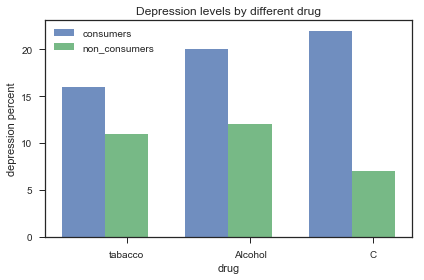

In [58]:
fig, ax = plt.subplots()
index = np.arange(n_groups)
rects1 = plt.bar(index, consumers, bar_width,
                 alpha=opacity,
                 color='b',
                 label='consumers')
 
rects2 = plt.bar(index + bar_width, non_consumers, bar_width,
                 alpha=opacity,
                 color='g',
                 label='non_consumers')
plt.xlabel('drug')
plt.ylabel('depression percent')
plt.title('Depression levels by different drug')
plt.xticks(index + bar_width, ('tabacco', 'Alcohol', 'C', 'D'))
plt.legend()
 
plt.tight_layout() 

Text(0.5,1,'Programming language usage')

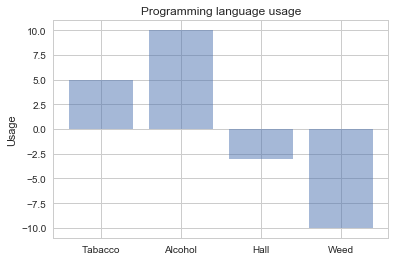

In [62]:
objects = ('Tabacco', 'Alcohol', 'Hall', 'Weed')
y_pos = np.arange(len(objects))
performance = [5, 10, -3, -10]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

In [79]:
X = cig_dep[['CIGFLAG']]
y = cig_dep['AMDELT']
model = LogisticRegression()
model.fit(X, y)
prediction = model.predict(X)

In [90]:
model = LogisticRegression()

In [91]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
prediction = model.predict(X)

In [93]:
prediction

array([2, 2, 2, ..., 2, 2, 2])

In [94]:
model.score(X, y)

0.8514006012077359

In [95]:
model.predict_proba(X)

array([[0.1128557 , 0.8871443 ],
       [0.1128557 , 0.8871443 ],
       [0.16780479, 0.83219521],
       ...,
       [0.1128557 , 0.8871443 ],
       [0.1128557 , 0.8871443 ],
       [0.16780479, 0.83219521]])

In [96]:
model.coef_

array([[-0.46063192]])

In [98]:
model.decision_function(X)

array([2.0618976 , 2.0618976 , 1.60126568, ..., 2.0618976 , 2.0618976 ,
       1.60126568])

Features to include in the model:
Age of first use:
IRCIGAGE cigarette
IRCGRAGE cigar
IRSNFAGE snugg
IRALCAGE alcohol
IRMJAGE marijuana
IRCOCAGE cocaine
IRCRKAGE crack
IRHERAGE heroin
IRHALAGE hallucinogen
IRINHAGE inhalants
IRANLAGE pain relievers
IRTRNAGE tranquilizer
IRSTMAGE stimulants
IRSEDAGE sedatives
Ever used:
CIGFLAG cigarette
CGRFLAG cigar
SNFFLAG snuff
ALCFLAG alcohol
MRJFLAG marijuana
COCFLAG cocaine
CRKFLAG crack
HERFLAG heroin
HALFLAG hallucinogen
INHFLAG inhalants
ANLFLAG pain relievers
TRQFLAG tranquilizer
STMFLAG stimulants
SEDFLAG sedatives
Past year frequency of use (range 1-365):
IRALCFY alcohol
IRMJFY marijuana
IRCOCFY cocaine
IRCRKFY crack
IRHERFY heroin
IRHALFY hallucinogen
IRINHFY inhalants
IRANLFY pain relievers
IRTRNFY tranquilizer
IRSTMFY stimulants
IRSEDFY sedatives
Past month frequency of use (range 1-30):
IRCIGFM cigarette
Past year use; 0 never used, 1 used within the past year:
CIGYR cigarette
CGRYR cigar
SNFYR snuff
ALCYR alcohol
MRJYR marijuana
COCYR cocaine
CRKYR crack
HERYR heroin
HALYR hallucinogens
INHYR inhalants
ANLYR pain relievers
TRQYR tranquilizer
STMYR stimulants
SEDYR sedatives
CATAGE age category

In [163]:
X = df[['IRCIGAGE', 'IRCGRAGE', 'IRSNFAGE', 'IRALCAGE', 'IRMJAGE', 'IRCOCAGE', 'IRCRKAGE', 'IRHERAGE', 'IRHALAGE', 'IRINHAGE', 'IRANLAGE', 'IRTRNAGE','IRSTMAGE','IRSEDAGE', 'CIGFLAG', 'CGRFLAG', 'SNFFLAG', 'ALCFLAG', 'MRJFLAG', 'COCFLAG', 'CRKFLAG', 'HERFLAG','HALFLAG','INHFLAG', 'ANLFLAG', 'TRQFLAG', 'STMFLAG', 'SEDFLAG', 'IRALCFY', 'IRMJFY', 'IRCOCFY','IRCRKFY','IRHERFY', 'IRHALFY', 'IRINHFY', 'IRANLFY', 'IRTRNFY', 'IRSTMFY','IRSEDFY','IRCIGFM','CIGYR','CGRYR','SNFYR','ALCYR','MRJYR','COCYR','CRKYR','HERYR','HALYR','INHYR' ,'ANLYR','TRQYR','STMYR', 'SEDYR', 'CATAGE']]
y = df[['AMDEYR']]

In [164]:
#Create a mask to remove rows 'Aged 12-17'
mask = y[y.AMDEYR < 0]
rows_to_remove = list(mask.index.values)
X = X.drop(X.index[rows_to_remove])

In [165]:
y = y[y.AMDEYR > 0]
y= y.T.squeeze()

In [166]:
X.shape

(37547, 55)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
X_train.shape

(25156, 55)

In [169]:
X_test.shape

(12391, 55)

In [170]:
y.shape

(37547,)

In [197]:
y_train

2927     1
21907    2
14050    2
44556    2
32432    2
30278    2
17755    2
38744    2
1584     2
9957     1
43756    2
44255    2
5887     2
42524    2
9255     2
51706    2
1027     2
46026    2
37127    2
54205    2
19931    1
30420    1
46775    2
39294    2
38151    2
41084    2
8496     2
22576    2
19522    2
46849    1
        ..
5683     2
5192     2
16709    2
46508    2
1814     2
2773     2
52684    2
28052    2
262      2
4027     1
27056    1
27780    1
37723    1
40456    1
9362     1
42255    2
28991    2
25794    2
7760     2
3565     1
1099     2
2448     2
23528    2
32237    2
54771    2
24763    2
9164     2
16564    2
1229     2
23184    1
Name: AMDEYR, Length: 25156, dtype: int64

In [184]:
clf = RandomForestClassifier()

In [185]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [186]:
predictions = clf.predict(X_test)

In [187]:
for i in range(0, 5):
    print("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test)[i], predictions[i]))

Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2


In [188]:
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.9816346000954047
Test Accuracy  ::  0.9029134048906464


In [189]:
confusion_matrix(y_test, predictions).ravel()

array([   29,  1012,   191, 11159])

In [190]:
probs = clf.predict_proba(X_test)

In [191]:
probs

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       ...,
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8]])

In [192]:
preds = probs[:,1]

In [193]:
preds

array([1. , 1. , 1. , ..., 0.8, 1. , 0.8])

In [194]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=1)

In [195]:
roc_auc = metrics.auc(fpr, tpr)

Text(0.5,0,'False Positive Rate')

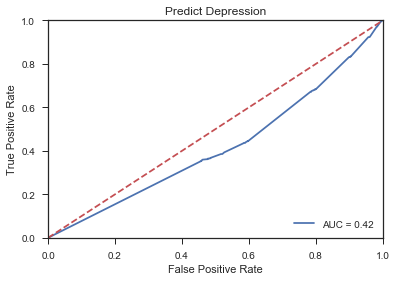

In [196]:
plt.title('Predict Depression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')